In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analyzing-student-academic-trends/student_exam_scores.csv


In [2]:
df = pd.read_csv('/kaggle/input/analyzing-student-academic-trends/student_exam_scores.csv')

# **Step 1: Data Understanding**
* Dataframe `shape`
* `head` and `tail`
* `dtypes`
* `describe`

In [3]:
df.shape

(200, 6)

In [4]:
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [5]:
df.tail()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0
199,S200,10.2,6.3,97.4,68,37.8


In [6]:
df.dtypes

student_id             object
hours_studied         float64
sleep_hours           float64
attendance_percent    float64
previous_scores         int64
exam_score            float64
dtype: object

# **Step 2: Data Preparation**
* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

In [7]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [8]:
df.isna()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [9]:
df.isna().sum()

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

#df.duplicated().sum()

In [11]:
df.loc[df.duplicated()]

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score


# **Step 3: Feature Understanding**
(Univariate analysis)

* Plotting Feature Distributions
* Histogram
* KDE
* Boxplot

In [12]:
df.columns

Index(['student_id', 'hours_studied', 'sleep_hours', 'attendance_percent',
       'previous_scores', 'exam_score'],
      dtype='object')

In [13]:
# This created issues for me
df['exam_score'].sort_values(ascending=False)\
.head(10)

86     51.3
83     48.9
60     48.6
120    47.9
71     47.9
193    46.7
53     46.4
115    46.4
20     46.0
146    45.8
Name: exam_score, dtype: float64

Text(0, 0.5, 'Exam Scores')

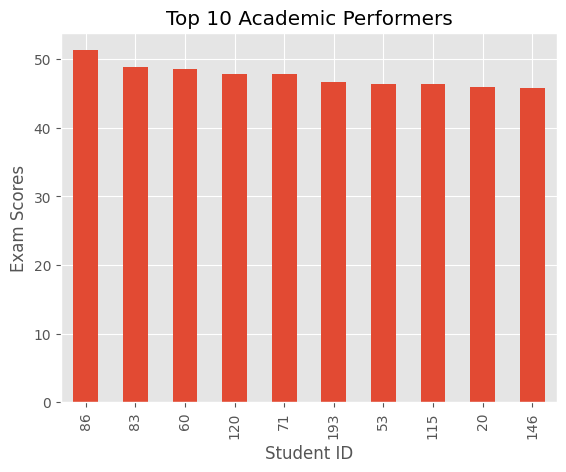

In [14]:
# first diagram I got
ax = df['exam_score'].sort_values(ascending = False) \
    .head(10) \
    .plot(kind='bar', title='Top 10 Academic Performers')
ax.set_xlabel('Student ID')
ax.set_ylabel('Exam Scores')

Text(0, 0.5, 'Exam Scores')

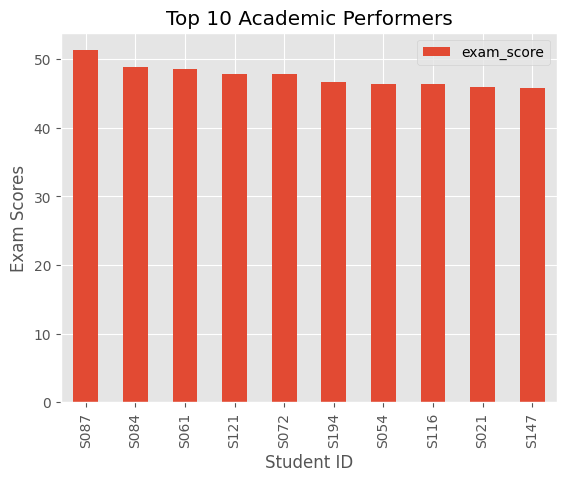

In [15]:
# Correct one
top_students = df.sort_values('exam_score', ascending=False).head(10)
ax = top_students.plot(x='student_id', y='exam_score', kind='bar', 
                       title='Top 10 Academic Performers')
ax.set_xlabel('Student ID')
ax.set_ylabel('Exam Scores')

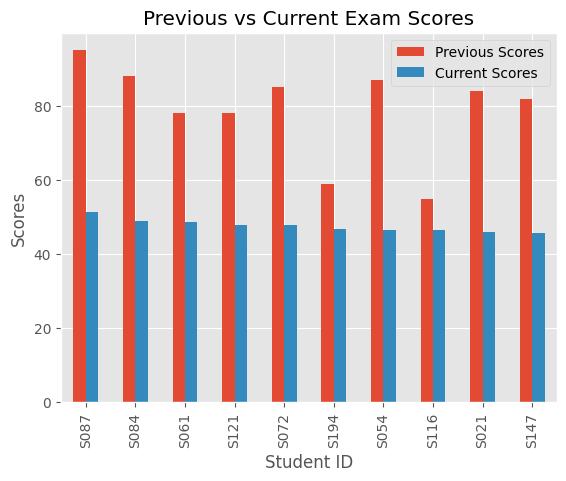

In [16]:
# Comparing previous scores with recent ones
ax = top_students.plot(x='student_id', y=['previous_scores', 'exam_score'], 
                       kind='bar',
                       title='Previous vs Current Exam Scores')
ax.set_xlabel('Student ID')
ax.set_ylabel('Scores')
ax.legend(['Previous Scores', 'Current Scores'])
plt.show()

# **Step 4: Feature Relationships**
* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby comparisons

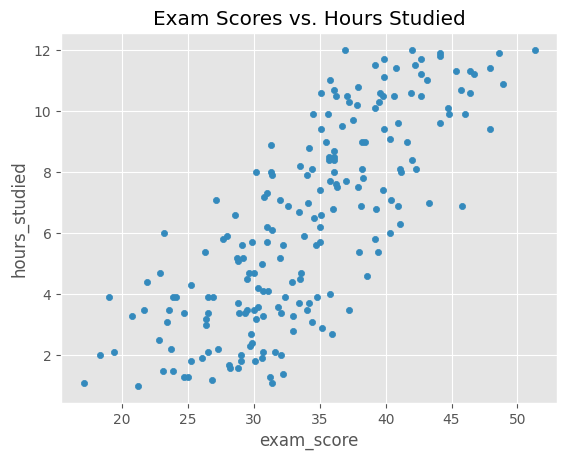

In [17]:
df.plot(kind='scatter',
        x='exam_score',
        y='hours_studied',
        title='Exam Scores vs. Hours Studied')
plt.show()

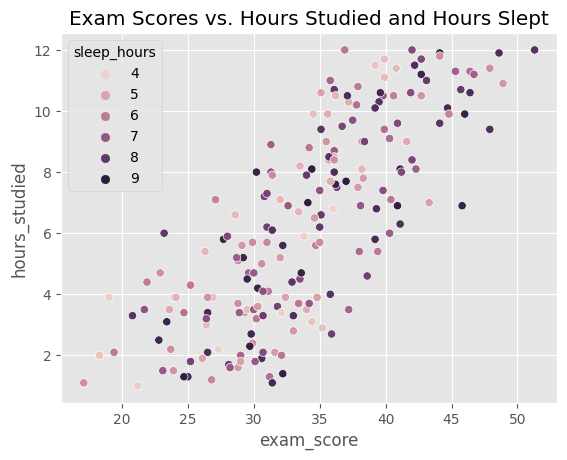

In [18]:
ax = sns.scatterplot(x='exam_score',
                y='hours_studied',
                hue='sleep_hours',
                data=df)
ax.set_title('Exam Scores vs. Hours Studied and Hours Slept')
plt.show()

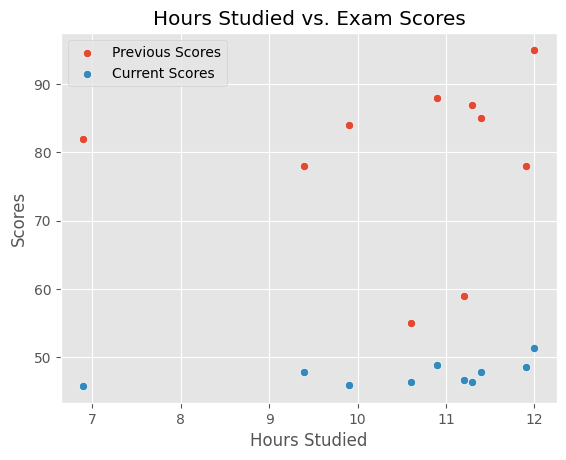

In [19]:
ax = sns.scatterplot(data=top_students, x='hours_studied', y='previous_scores', label='Previous Scores')
sns.scatterplot(data=top_students, x='hours_studied', y='exam_score', label='Current Scores', ax=ax)
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Scores')
ax.set_title('Hours Studied vs. Exam Scores')
plt.show()

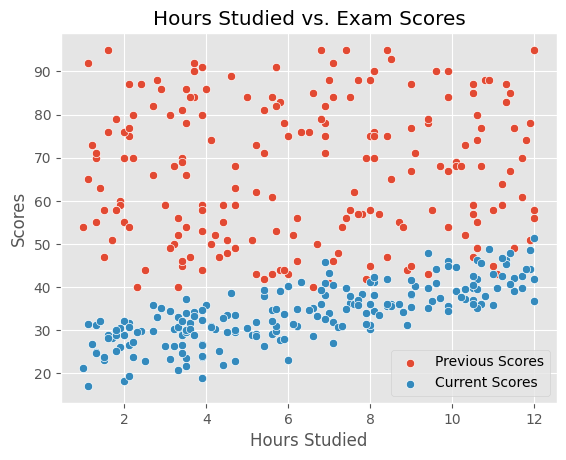

In [20]:
ax = sns.scatterplot(data=df, x='hours_studied', y='previous_scores', label='Previous Scores')
sns.scatterplot(data=df, x='hours_studied', y='exam_score', label='Current Scores', ax=ax)
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Scores')
ax.set_title('Hours Studied vs. Exam Scores')
plt.show()

# **Step 5: Question**

## **What Caused Such Decline In Student Scores?**